# *The Reuters Dataset: multiclass classification example*
There are 46 different topics; some topics are more represented than others, but each topic has at least 10 examples in the training set.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data( num_words=10000 )

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
print("Training data:", len(train_data), ", Test data:", len(test_data))

Training data: 8982 , Test data: 2246


In [3]:
print("Train data[10]:", train_data[10], ",\n train_label[10]:", train_labels[10])

Train data[10]: [1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12] ,
 train_label[10]: 3


In [4]:
# We can vectorize the data
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print("x train:", x_train[10],
      "x test:", x_test[10])

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

print("y train:", y_train[10],
      "y test:", y_test[10])

x train: [0. 1. 0. ... 0. 0. 0.] x test: [0. 1. 1. ... 0. 0. 0.]
y train: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] y test: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


This topic-classification problem looks similar to the previous movie-review classification problem: in both cases, we’re trying to classify short snippets of text. But there is a new constraint here: the number of output classes has gone from 2 to 46. The dimensionality of the output space is much larger.

In [5]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

First, we end the model with a Dense layer of size 46. This means for each input sample, the network will output a 46-dimensional vector. Each entry in this vector (each dimension) will encode a different output class.

Second, the last layer uses a softmax activation. You saw this pattern in the MNIST example. It means the model will output a probability distribution over the 46 different output classes—for every input sample, the model will produce a 46-dimensional output vector, where output[i] is the probability that the sample belongs to class i. The 46 scores will sum to 1.

The best loss function to use in this case is categorical_crossentropy. It measures the distance between two probability distributions: here, between the probability distribution output by the model and the true distribution of the labels. By minimizing the distance between these two distributions, you train the model to output something as close as possible to the true labels.



In [6]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [7]:
# Validation
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [8]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.4027 - loss: 3.1807 - val_accuracy: 0.6230 - val_loss: 1.7778
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.6723 - loss: 1.6080 - val_accuracy: 0.6930 - val_loss: 1.3727
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.7433 - loss: 1.1964 - val_accuracy: 0.7260 - val_loss: 1.2239
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.7778 - loss: 0.9956 - val_accuracy: 0.7580 - val_loss: 1.0959
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8299 - loss: 0.7711 - val_accuracy: 0.7880 - val_loss: 1.0111
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.8496 - loss: 0.6827 - val_accuracy: 0.7910 - val_loss: 0.9755
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.8744 - loss: 0.5714 - val_accuracy: 0.8010 - val_loss: 0.9388
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8952 - loss: 0.4919 - val_accuracy: 0.8060 - v

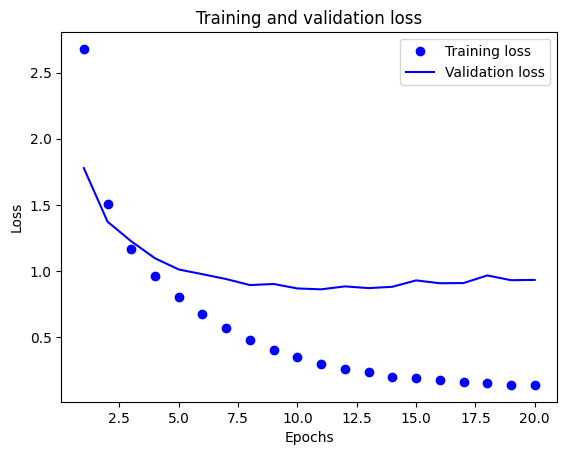

In [9]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

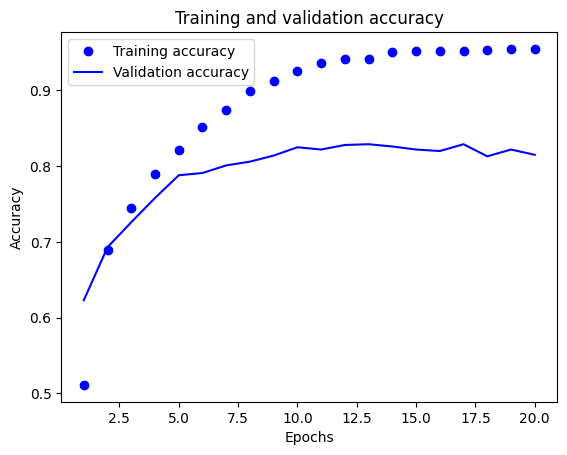

In [10]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [11]:
#The model begins to overfit after nine epochs. Let’s train a new model from scratch for nine epochs and then evaluate it on the test set.

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.3980 - loss: 3.1617
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.6756 - loss: 1.5738
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.7518 - loss: 1.1513
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.7971 - loss: 0.9421
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8320 - loss: 0.7791
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.8635 - loss: 0.6339
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.8827 - loss: 0.5441
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9088 - loss: 0.4393
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9309 - loss: 0.3459
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8001 - loss: 0.9001


In [12]:
# Calling the model’s predict method on new samples returns a class probability distribution over all 46 topics for each sample.
# Let’s generate topic predictions for all of the test data:

predictions = model.predict(x_test)
predictions[0].shape

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


(46,)